In [1]:
%matplotlib widget
from marubatsu import Marubatsu

mb = Marubatsu()
mb.play(ai=[None, None], gui=True)

ImportError: cannot import name 'Marubatsu' from partially initialized module 'marubatsu' (most likely due to a circular import) (c:\Users\ys\ai\marubatsu\075\marubatsu.py)

In [2]:
import test

In [3]:
import test3

AttributeError: partially initialized module 'test3' has no attribute 'a' (most likely due to a circular import)

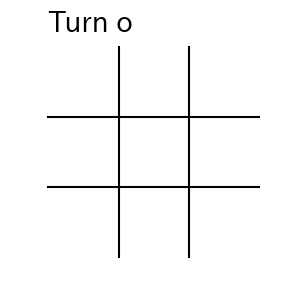

In [4]:
from marubatsu_correct import Marubatsu
import ai

# Dropdown の作成の際に必要となる、AI のリストを作成する    
ai_list = []
for i in range(1, 15):
    ai_name = f"ai{i}s"  
    ai_list.append((ai_name, getattr(ai, ai_name)))    
    
mb = Marubatsu()
mb.play(ai=[None, None], ai_list=ai_list, gui=True)

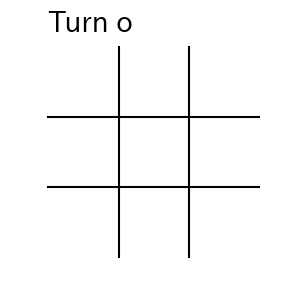

In [5]:
mb.play(ai=[None, None],  gui=True)

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math

def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        if ai[i] is None:
            ai_list.append(("人間", None))
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

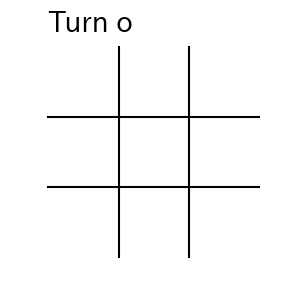

In [7]:
mb.play(ai=[None, None], gui=True);

In [8]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        if ai[i] is None and None not in ai_values:
            ai_list.append(("人間", None))
            ai_values.append(None)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

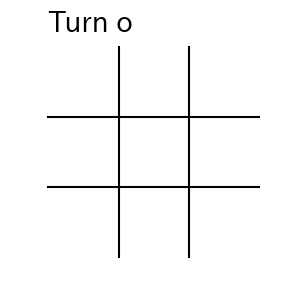

In [9]:
mb.play(ai=[None, None], gui=True);

In [10]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ai[i] が ai_values に登録済かどうかを判定する
        if ai[i] not in ai_values:
            # ラベルを計算する
            if ai[i] is None:
                label = "人間"
            else:
                label = ai[i].__name__        
            # 項目を登録する
            ai_list.append((label, ai[i]))
            ai_values.append(ai[i])
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

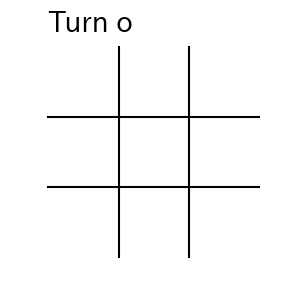

In [11]:
from ai import ai1s

mb.play(ai=[None, ai1s],  gui=True)

In [12]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ai[i] が ai_values に登録済かどうかを判定する
        if ai[i] not in ai_values:
            # ラベルを計算する
            if ai[i] is None:
                label = "人間"
            else:
                label = ai[i].__name__        
            # 項目を登録する
            ai_list.append((label, ai[i]))
            ai_values.append(ai[i])
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=ai[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=ai[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

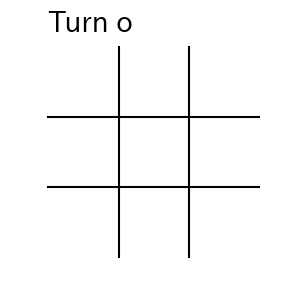

In [13]:
mb.play(ai=[None, ai1s],  gui=True)

In [14]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ai[i] が ai_values に登録済かどうかを判定する
        if ai[i] not in ai_values:
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=ai[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=ai[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

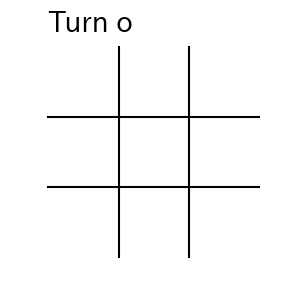

In [15]:
mb.play(ai=[None, ai1s],  gui=True)

In [16]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ai[i] が ai_values に登録済かどうかを判定する
        if ai[i] not in ai_values:
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
            select_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

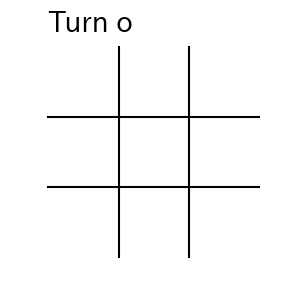

In [17]:
mb.play(ai=[None, ai1s], gui=True)